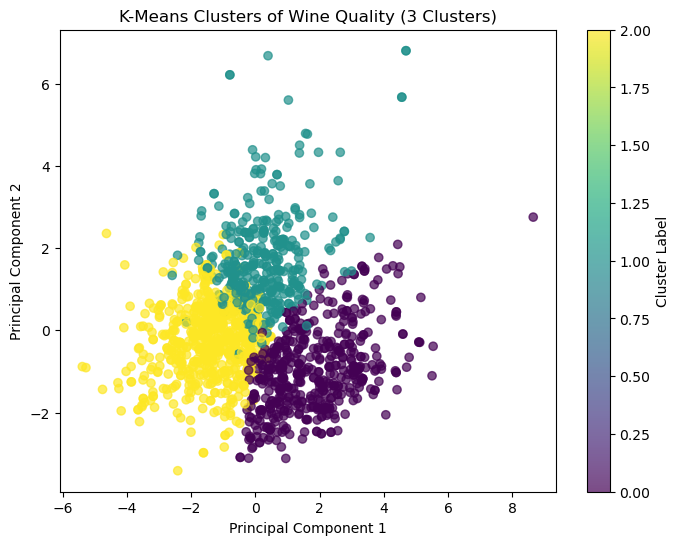

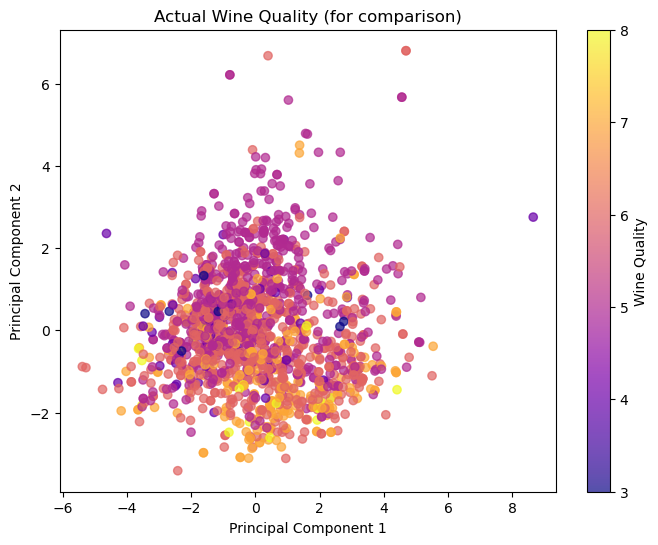

In [1]:
# K-Means Clustering on Wine Quality Dataset (with PCA for visualization)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# -----------------------------
# Load Dataset
# -----------------------------
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
data = pd.read_csv(url, sep=';')

X = data.drop('quality', axis=1).values
y = data['quality'].values  # Keep for coloring in visualization

# -----------------------------
# Feature Scaling
# -----------------------------
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# -----------------------------
# Dimensionality Reduction for Visualization
# -----------------------------
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# -----------------------------
# Apply K-Means
# -----------------------------
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# -----------------------------
# Visualization of Clusters in PCA Space
# -----------------------------
plt.figure(figsize=(8,6))
scatter = plt.scatter(
    X_pca[:,0], X_pca[:,1],
    c=clusters, cmap='viridis', alpha=0.7
)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("K-Means Clusters of Wine Quality (3 Clusters)")
cbar = plt.colorbar(scatter)
cbar.set_label("Cluster Label")
plt.show()

# -----------------------------
# Optional: Compare clusters to actual quality
# -----------------------------
plt.figure(figsize=(8,6))
scatter2 = plt.scatter(
    X_pca[:,0], X_pca[:,1],
    c=y, cmap='plasma', alpha=0.7
)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("Actual Wine Quality (for comparison)")
cbar2 = plt.colorbar(scatter2)
cbar2.set_label("Wine Quality")
plt.show()

## Summary & Discussion

#We applied **K-Means Clustering** to group wines based on physicochemical features. K-Means is an unsupervised learning algorithm that partitions data into \(k\) clusters by minimizing within-cluster variance.

#**Key Points:**
#- PCA was used to reduce the data to 2 dimensions for visualization.
#- The algorithm identified 3 clusters, which roughly correspond to patterns in wine quality.
#- Cluster labels can be compared to actual wine quality for insight, though K-Means does not use target labels in training.

#**Limitations:**
#- K-Means assumes spherical clusters of similar size.
#- Sensitive to feature scaling and choice of \(k\).
#- High-dimensional patterns may not be fully captured by 2D PCA visualization.

#**Potential Improvements:**
#- Use the **Elbow Method** or **Silhouette Score** to select an optimal \(k\).
#- Explore hierarchical or density-based clustering methods (DBSCAN).
#- Combine clustering with supervised learning for semi-supervised approaches.

#**Conclusion:**
#K-Means provides a simple and intuitive method for discovering structure in unlabeled data. Using PCA for visualization allows us to explore and interpret high-dimensional datasets effectively.
